# Machine Learning

In [423]:
# 3rd Party Imports
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [424]:
# Import Combined Data
data = pd.read_csv("combined_data.csv")
data = gpd.GeoDataFrame(data, geometry=gpd.GeoSeries.from_wkt(data['geometry']), crs="EPSG:4326")
data.head()

,geometry,total_area_within_800m,distance_to_subway,distance_to_school,EQAO_% at Levels\n3/4,OSSLT_Successful\n(Fully\nParticipating),Score,Sold Price,price,Building Type,Type,Square Footage
0,POINT (-5303780.98636 10522212.05124),0.023400,5825.911351,3027.312767,28%,291,4.5,"$680,000",NaN,NaN,Condo Apt,NaN
1,POINT (-5291789.81877 10529750.1322),0.103265,9229.458226,1281.381954,15%,199,4.6,"$815,000",NaN,NaN,Detached,NaN
2,POINT (-5301806.27269 10508190.36916),0.708611,102.124797,353.792606,61%,357,9.1,"$650,000",NaN,NaN,Condo Apt,NaN
3,POINT (-5304216.94803 10521674.15672),0.043920,5306.985926,3337.727572,28%,291,4.5,"$588,000",NaN,NaN,Condo Apt,NaN
4,POINT (-5311194.93673 10513210.10579),0.106447,2390.737995,1006.456152,59%,163,7.0,"$740,000",NaN,NaN,Condo Townhouse,NaN


In [425]:
# Merge Sold Price and Price Columns
data["Final Price"] = data["Sold Price"].fillna(data["price"])
data.drop(columns=["Sold Price", "price"], inplace=True)
data.head()


,geometry,total_area_within_800m,distance_to_subway,distance_to_school,EQAO_% at Levels\n3/4,OSSLT_Successful\n(Fully\nParticipating),Score,Building Type,Type,Square Footage,Final Price
0,POINT (-5303780.98636 10522212.05124),0.023400,5825.911351,3027.312767,28%,291,4.5,NaN,Condo Apt,NaN,"$680,000"
1,POINT (-5291789.81877 10529750.1322),0.103265,9229.458226,1281.381954,15%,199,4.6,NaN,Detached,NaN,"$815,000"
2,POINT (-5301806.27269 10508190.36916),0.708611,102.124797,353.792606,61%,357,9.1,NaN,Condo Apt,NaN,"$650,000"
3,POINT (-5304216.94803 10521674.15672),0.043920,5306.985926,3337.727572,28%,291,4.5,NaN,Condo Apt,NaN,"$588,000"
4,POINT (-5311194.93673 10513210.10579),0.106447,2390.737995,1006.456152,59%,163,7.0,NaN,Condo Townhouse,NaN,"$740,000"


In [426]:
# Merge Building Type and Type Columns
data["Final Type"] = data["Type"].fillna(data["Building Type"])
data.drop(columns=["Type", "Building Type"], inplace=True)
data.head()


,geometry,total_area_within_800m,distance_to_subway,distance_to_school,EQAO_% at Levels\n3/4,OSSLT_Successful\n(Fully\nParticipating),Score,Square Footage,Final Price,Final Type
0,POINT (-5303780.98636 10522212.05124),0.023400,5825.911351,3027.312767,28%,291,4.5,NaN,"$680,000",Condo Apt
1,POINT (-5291789.81877 10529750.1322),0.103265,9229.458226,1281.381954,15%,199,4.6,NaN,"$815,000",Detached
2,POINT (-5301806.27269 10508190.36916),0.708611,102.124797,353.792606,61%,357,9.1,NaN,"$650,000",Condo Apt
3,POINT (-5304216.94803 10521674.15672),0.043920,5306.985926,3337.727572,28%,291,4.5,NaN,"$588,000",Condo Apt
4,POINT (-5311194.93673 10513210.10579),0.106447,2390.737995,1006.456152,59%,163,7.0,NaN,"$740,000",Condo Townhouse


In [427]:
data["Final Type"].value_counts()

Final Type
Detached              2101
Condo Apt             1288
Apartment              633
House                  293
Semi-Detached          241
Condo Townhouse        163
Row / Townhouse         95
Freehold Townhouse      76
Co-Op Apt               10
Duplex                  10
Triplex                  7
Link                     7
Investment               6
Parking Space            5
Condo/Apt Unit           5
Co-Ownership Apt         3
Store W/Apt/Office       3
Att/Row/Twnhouse         2
Commercial/Retail        2
Land                     2
Vacant Land              1
Multiplex                1
Office                   1
Name: count, dtype: int64

In [428]:
house_types = ["Detached", "House", "Semi-Detached", "Row / Townhouse", "Freehold Townhouse", "Duplex", "Triplex"]
data = data[data["Final Type"].isin(house_types)]
data.head()

,geometry,total_area_within_800m,distance_to_subway,distance_to_school,EQAO_% at Levels\n3/4,OSSLT_Successful\n(Fully\nParticipating),Score,Square Footage,Final Price,Final Type
1,POINT (-5291789.81877 10529750.1322),0.103265,9229.458226,1281.381954,15%,199,4.6,NaN,"$815,000",Detached
6,POINT (-5312220.98996 10514480.58172),0.017557,3283.465264,836.707520,59%,163,7.0,NaN,"$2,463,000",Detached
7,POINT (-5310567.6504 10513982.37492),0.069195,1701.794951,1566.189206,59%,163,7.0,NaN,"$2,700,000",Detached
9,POINT (-5291789.81877 10529750.1322),0.013039,9229.458226,1281.381954,15%,199,4.6,NaN,"$815,000",Detached
14,POINT (-5312220.98996 10514480.58172),2.652405,3283.465264,836.707520,59%,163,7.0,NaN,"$2,463,000",Detached


In [429]:
# Clean School Data
data['EQAO_% at Levels\n3/4'] = data['EQAO_% at Levels\n3/4'].replace({'%': ''}, regex=True).astype(float) / 100
data["OSSLT_Successful\n(Fully\nParticipating)"] = data["OSSLT_Successful\n(Fully\nParticipating)"].replace({'%': ''}, regex=True).astype(float) / 100
data.head()

,geometry,total_area_within_800m,distance_to_subway,distance_to_school,EQAO_% at Levels\n3/4,OSSLT_Successful\n(Fully\nParticipating),Score,Square Footage,Final Price,Final Type
1,POINT (-5291789.81877 10529750.1322),0.103265,9229.458226,1281.381954,0.15,1.99,4.6,NaN,"$815,000",Detached
6,POINT (-5312220.98996 10514480.58172),0.017557,3283.465264,836.707520,0.59,1.63,7.0,NaN,"$2,463,000",Detached
7,POINT (-5310567.6504 10513982.37492),0.069195,1701.794951,1566.189206,0.59,1.63,7.0,NaN,"$2,700,000",Detached
9,POINT (-5291789.81877 10529750.1322),0.013039,9229.458226,1281.381954,0.15,1.99,4.6,NaN,"$815,000",Detached
14,POINT (-5312220.98996 10514480.58172),2.652405,3283.465264,836.707520,0.59,1.63,7.0,NaN,"$2,463,000",Detached


In [430]:
# Drop NA Values
data = data.dropna()

In [431]:
# Clean Square Footage Column
def convert_sqft(value):
    if isinstance(value, str) and " - " in value:
        start, end = value.split(" - ")
        start = int(start.replace(' sqft', '').strip())
        end = int(end.replace(' sqft', '').strip())
        return (start + end) / 2
    elif isinstance(value, str) and 'sqft' in value:
        return int(value.replace(' sqft', '').strip())
    return value

# Apply the function to your column
data['Square Footage'] = data['Square Footage'].apply(convert_sqft)

In [432]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['EQAO_% at Levels\n3/4', 'OSSLT_Successful\n(Fully\nParticipating)', 'Score']

X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3) 
principal_components = pca.fit_transform(X_scaled)

data[['PCA_1', 'PCA_2', 'PCA_3']] = principal_components

data = data.drop(columns=features)

# Optional: To view the variance explained by each principal component
print("Explained variance ratio by each component:", pca.explained_variance_ratio_)


Explained variance ratio by each component: [0.7637659  0.19334216 0.04289193]


In [433]:
# Drop NA Values
data = data.dropna()

In [434]:
# Split Data into Training and Testing Data
from sklearn.model_selection import train_test_split  

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [435]:
# Calculate Social Infrastructure Premium
train = train[~train["Final Price"].str.contains("Monthly|Weekly|%", na=False)]
test = test[~test["Final Price"].str.contains("Monthly|Weekly|%", na=False)]
train["Final Price"] = train["Final Price"].replace({'\$': '', ',': ''}, regex=True)
test["Final Price"] = test["Final Price"].replace({'\$': '', ',': ''}, regex=True)
train["Final Price"] = train["Final Price"].astype(float)
test["Final Price"] = test["Final Price"].astype(float)
average_house_price = train["Final Price"].mean()

train["Social Infrastructure Premium"] = (train["Final Price"] - average_house_price) / train["Square Footage"]
test["Social Infrastructure Premium"] = test["Final Price"] - average_house_price / test["Square Footage"]

# Drop Unnecessary Columsn
train = train.drop(columns=["geometry", "Final Price", "Final Type", "Square Footage"])
test = test.drop(columns=["geometry", "Final Price", "Final Type", "Square Footage"])

train.head()

,total_area_within_800m,distance_to_subway,distance_to_school,PCA_1,PCA_2,PCA_3,Social Infrastructure Premium
3290,0.0,1947.238544,5090.550536,3.247460,-0.836533,0.071312,443.314304
3362,0.0,9067.240859,3784.669580,-0.001267,-0.693293,-0.264318,-201.740093
3455,0.0,937.874422,3392.798768,-1.678404,0.538711,-0.064139,16.394833
2772,0.0,10573.975792,2604.626980,-0.038961,-0.320362,-0.628217,-268.406315
2685,0.0,3304.801822,1505.846555,1.087671,-0.194383,0.741302,-504.743523


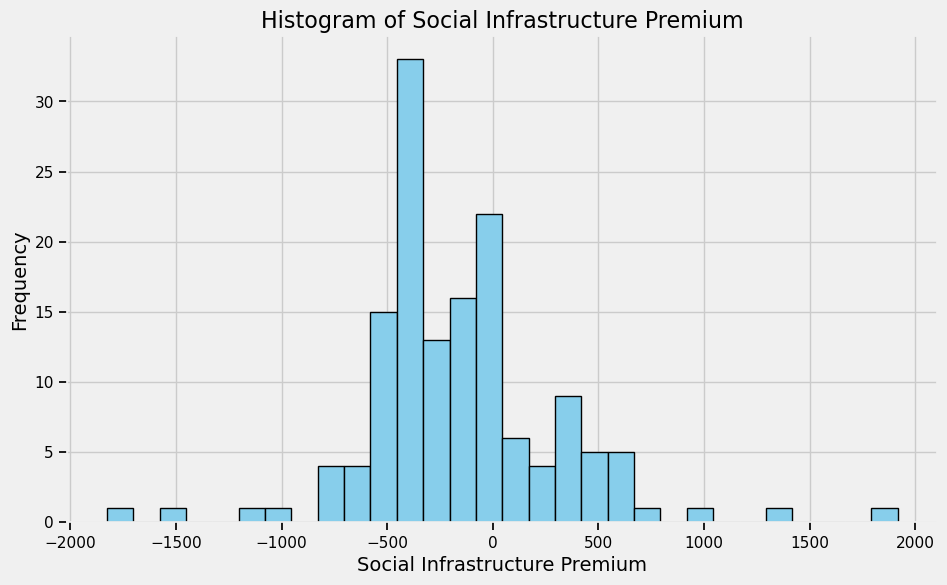

In [436]:
# Plot Histogram of Social Infrastructure Premium
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train["Social Infrastructure Premium"], bins=30, edgecolor='black', color='skyblue')

plt.title('Histogram of Social Infrastructure Premium', fontsize=16)
plt.xlabel('Social Infrastructure Premium', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

In [437]:
# Train Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train = train.drop(columns=["Social Infrastructure Premium"])
X_test = test.drop(columns=["Social Infrastructure Premium"])
y_train = train["Social Infrastructure Premium"]
y_test = test["Social Infrastructure Premium"]

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [438]:
# Evaluate Model
y_pred = rf.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 112.04699614016778
R^2 Score: 0.8688470176453826


In [439]:
# Evaluate Model
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1526261.7690856329
R^2 Score: -2.579934813002754


In [440]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

                  Feature  Importance
3                   PCA_1    0.307728
1      distance_to_subway    0.283942
2      distance_to_school    0.222434
5                   PCA_3    0.094594
4                   PCA_2    0.091301
0  total_area_within_800m    0.000000
